In [3]:
import tensorflow as tf

In [4]:
#import basic libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [5]:
df = pd.read_csv('/content/drive/MyDrive/Data Sets/insurance.csv')
df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [6]:
# df.iloc[:5 , 0]
# Dividing data into dependent(Output) and Independent(Input) Columns
x = df.iloc[:, :6]     #Inputs
y = df.iloc[:, -1]     #Output

In [7]:
x.head()

,age,sex,bmi,children,smoker,region
0,19,female,27.900,0,yes,southwest
1,18,male,33.770,1,no,southeast
2,28,male,33.000,3,no,southeast
3,33,male,22.705,0,no,northwest
4,32,male,28.880,0,no,northwest


In [8]:
y.head()

,charges
0,16884.92400
1,1725.55230
2,4449.46200
3,21984.47061
4,3866.85520


In [9]:
#Cleaning Input data..

# x['children'].value_counts()
# x['sex'].value_counts()
# x['smoker'].value_counts()
# x['region'].value_counts()
# df.isnull().sum()

In [10]:


#Doing standard Scaling

from sklearn.preprocessing import StandardScaler

numerical_cols = ['age', 'bmi', 'children']
scaler = StandardScaler()
x[numerical_cols] = scaler.fit_transform(x[numerical_cols])


In [11]:
x.head()

,age,sex,bmi,children,smoker,region
0,-1.438764,female,-0.453320,-0.908614,yes,southwest
1,-1.509965,male,0.509621,-0.078767,no,southeast
2,-0.797954,male,0.383307,1.580926,no,southeast
3,-0.441948,male,-1.305531,-0.908614,no,northwest
4,-0.513149,male,-0.292556,-0.908614,no,northwest


In [12]:
# Doing lable encoding

from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
x['sex'] = le.fit_transform(x['sex'])
x['smoker'] = le.fit_transform(x['smoker'])

In [13]:
x.head()

,age,sex,bmi,children,smoker,region
0,-1.438764,0,-0.453320,-0.908614,1,southwest
1,-1.509965,1,0.509621,-0.078767,0,southeast
2,-0.797954,1,0.383307,1.580926,0,southeast
3,-0.441948,1,-1.305531,-0.908614,0,northwest
4,-0.513149,1,-0.292556,-0.908614,0,northwest


In [14]:
#Doing hot-endoding on regions

x = pd.get_dummies(x, columns=['region'])

In [15]:
x.head()

,age,sex,bmi,children,smoker,region_northeast,region_northwest,region_southeast,region_southwest
0,-1.438764,0,-0.453320,-0.908614,1,False,False,False,True
1,-1.509965,1,0.509621,-0.078767,0,False,False,True,False
2,-0.797954,1,0.383307,1.580926,0,False,False,True,False
3,-0.441948,1,-1.305531,-0.908614,0,False,True,False,False
4,-0.513149,1,-0.292556,-0.908614,0,False,True,False,False


In [16]:
#Lable encoding on regions

x['region_northeast'] = le.fit_transform(x['region_northeast'])
x['region_northwest'] = le.fit_transform(x['region_northwest'])
x['region_southwest'] = le.fit_transform(x['region_southwest'])
x['region_southeast'] = le.fit_transform(x['region_southeast'])

In [17]:
x.head()

,age,sex,bmi,children,smoker,region_northeast,region_northwest,region_southeast,region_southwest
0,-1.438764,0,-0.453320,-0.908614,1,0,0,0,1
1,-1.509965,1,0.509621,-0.078767,0,0,0,1,0
2,-0.797954,1,0.383307,1.580926,0,0,0,1,0
3,-0.441948,1,-1.305531,-0.908614,0,0,1,0,0
4,-0.513149,1,-0.292556,-0.908614,0,0,1,0,0


#Splitting dataset into trainig and test

In [18]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [19]:
x_test.shape

(268, 9)

#Now create ANN

In [20]:
#import required functions and classes

from tensorflow.keras.models import Sequential    #to implement neutral network as sequence of layers to implement forward and backward propogation
from tensorflow.keras.layers import Dense         #to create nodes of neutal network
from tensorflow.keras.layers import Dropout       #to eliminate useless nodes while model
from tensorflow.keras.layers import LeakyReLU , PReLU , ELU , ReLU   # Activation functions

In [21]:
# Function to build the ANN model
# from tensorflow.keras.layers import Input

# def build_model(input_dim, hidden_layers_units, dropout_rates, activation='relu', output_activation='linear'):
#     classifier = Sequential()

#     # Add input layer
#     classifier.add(Input(shape=(input_dim,))) # Use Input(shape)
#     classifier.add(Dense(units=hidden_layers_units[0], activation=activation)) # Removed input_dim from Dense
#     if dropout_rates[0] > 0:
#         classifier.add(Dropout(dropout_rates[0]))

#     # Add hidden layers
#     for i in range(1, len(hidden_layers_units)):
#         classifier.add(Dense(units=hidden_layers_units[i], activation=activation))
#         if dropout_rates[i] > 0:
#             classifier.add(Dropout(dropout_rates[i]))

#     # Add output layer
#     classifier.add(Dense(units=1, activation=output_activation))

#     return classifier

In [ ]:
#Early stoping (so i can stop training model when the val_loss become almost constant which means model is not become efficient anymore)
early_stopping = tf.keras.callbacks.EarlyStopping(
    monitor="val_loss",
    min_delta=1,
    patience=20,
    verbose=1,
    mode="auto",
    baseline=None,
    restore_best_weights=False,
    start_from_epoch=0,
)

In [22]:
# # Build the model with current hyperparameters
# input_dimension = x_train.shape[1]
# hidden_layer_sizes = [9, 7, 6] # Units for each hidden layer
# dropout_rates = [0.0, 0.2, 0.3] # Dropout rate after each layer (0.0 for no dropout)


# classifier = build_model(input_dimension, hidden_layer_sizes, dropout_rates)






In [51]:
classifier = Sequential()

try:
  load_model_from_drive = tf.keras.models.load_model('/content/drive/MyDrive/Trained Models/ANN_model_for_Calculating_Insurance_charges.h5')
  classifier = load_model_from_drive
  print("Model loaded from drive")
except:

  print("Training Model.....")

  #Add input layer

  # classifier.add(Dense(units=9, activation='relu'))   #unit 9 means i need 9 nodes in inpute layer for my 9 input columns


  classifier.add(Dense(units=9))
  classifier.add(LeakyReLU(alpha=0.01))          #r2_score=0.8135485901422423 and loss=28946344.0



  # classifier.add(Dense(units=9))
  # classifier.add(LeakyReLU(alpha=0.01))



  #first hidden layer

  # classifier.add(Dense(units=6, activation='relu'))    #=> r2_score=0.7699659197322903  and loss=35712496.0
  # classifier.add(Dropout(0.2))



  classifier.add(Dense(units=8))
  classifier.add(LeakyReLU(alpha=0.01))     #r2_score=0.8135485901422423 and loss=28946344.0
  classifier.add(Dropout(0.3))



  # classifier.add(Dense(units=5))
  # classifier.add(LeakyReLU(alpha=0.01))     #r2_score=0.7136465465 and loss= 43808132.0
  # classifier.add(Dropout(0.1))



  #Second hidden layer

  # classifier.add(Dense(units=5 , activation='relu))   #=> r2_score=0.7699659197322903  and loss=35712496.0
  # classifier.add(Dropout(0.3))



  classifier.add(Dense(units=7))
  classifier.add(LeakyReLU(alpha=0.01))   ##r2_score=0.8135485901422423 and loss=28946344.0
  classifier.add(Dropout(0.2))




  # classifier.add(Dense(units=4))
  # classifier.add(LeakyReLU(alpha=0.01))    #r2_score=0.7136465465 and loss= 43808132.0
  # classifier.add(Dropout(0.2))


  #Adding output layer

  classifier.add(Dense(units=1, activation='linear'))


  #Train ANN

  classifier.compile(optimizer='adam', loss='mean_squared_error')
  # classifier.compile(optimizer='adam', loss='huber_loss')

  #giving training Data

  # model_history = classifier.fit(x_train, y_train, validation_split=0.2, batch_size=10, epochs=1000 , callbacks=early_stopping)
  model_history = classifier.fit(x_train, y_train, validation_split=0.2, batch_size=10, epochs=1000 )


Model loaded from drive


Epoch 1/1000
86/86 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - loss: 330053280.0000 - val_loss: 310349696.0000
Epoch 2/1000
86/86 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 352806944.0000 - val_loss: 310287776.0000
Epoch 3/1000
86/86 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 343473280.0000 - val_loss: 309944544.0000
Epoch 4/1000
86/86 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 324749152.0000 - val_loss: 308536864.0000
Epoch 5/1000
86/86 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 331991808.0000 - val_loss: 304508480.0000
Epoch 6/1000
86/86 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 301580064.0000 - val_loss: 295910976.0000
Epoch 7/1000
86/86 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 309977280.0000 - val_loss: 281267104.0000
Epoch 8/1000
86/86 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 267484608.0000 - val_loss: 259328208.0000
Epoch 9/1000
86/86 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 251674288.0000 - val_loss: 230913680.0000
Epoch 10/1000
86/86 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 226500960.0000 - val_

In [30]:
model_history.history.keys()

dict_keys(['loss', 'val_loss'])

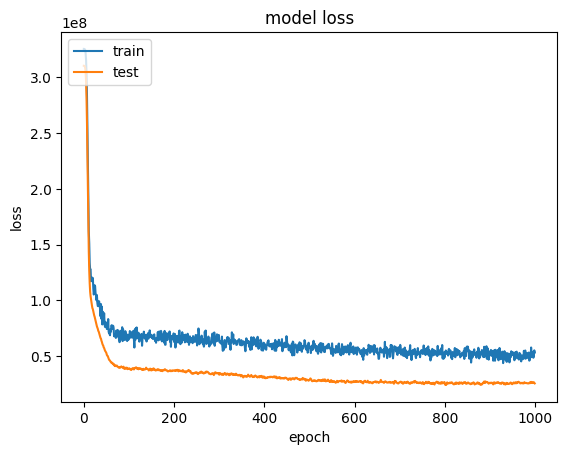

In [31]:
#Loss Graph

plt.plot(model_history.history['loss'])
plt.plot(model_history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')

In [44]:
#making predictions and evaluating the model

#predicting the tese set result

y_pred = classifier.predict(x_test)

9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 


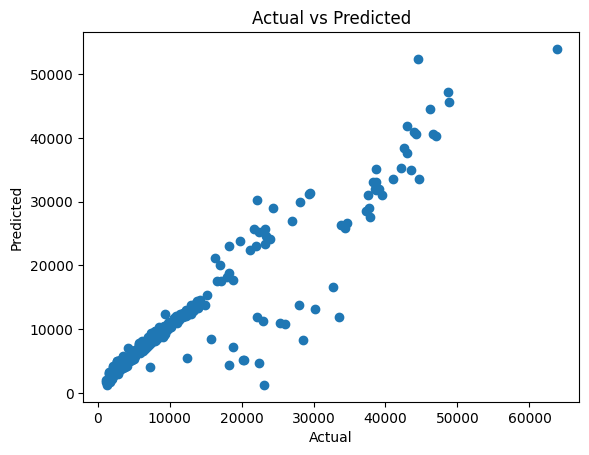

In [45]:
#graph b/w actual and prediction values of test data

plt.scatter(y_test, y_pred)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs Predicted')
plt.show()

In [46]:
#making r2 matrix

from sklearn.metrics import r2_score
r2 = r2_score(y_test, y_pred)
r2

0.8603484875680596

In [47]:
import pandas as pd

# Flatten y_pred if it's 2D
y_pred_flat = y_pred.ravel()   # or use .flatten()

comparison = pd.DataFrame({
    "Actual": y_test.values,
    "Predicted": y_pred_flat
})

print(comparison.head(20))


         Actual     Predicted
0    9095.06825   9412.006836
1    5272.17580   6252.336914
2   29330.98315  31217.378906
3    9301.89355   9336.871094
4   33750.29180  26409.302734
5    4536.25900   5595.479980
6    2117.33885   4294.963867
7   14210.53595  14641.411133
8    3732.62510   5395.352051
9   10264.44210  10419.846680
10  18259.21600  18855.056641
11   7256.72310   7861.977051
12   3947.41310   4845.294922
13  46151.12450  44558.027344
14  48673.55880  47234.664062
15  44202.65360  40617.421875
16   9800.88820  11014.208008
17  42969.85270  37568.226562
18   8233.09750   8915.001953
19  21774.32215  25729.785156


In [48]:
#calculate loss

loss = classifier.evaluate(x_test, y_test)
print("Loss : " ,loss)

r2_score = r2_score(y_test, y_pred)
print("R2 Score : " ,r2_score)

9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 20476352.0000 
Loss :  21680720.0
R2 Score :  0.8603484875680596


In [37]:
#get weighhts

# classifier.get_weights()

In [49]:
# Example of new input values
new_data = {
    # 'age': [30],
    # 'sex': ['female'],
    # 'bmi': [25.0],
    # 'children': [1],
    # 'smoker': ['no'],
    # 'region': ['southwest']
    'age': [53],
    'sex': ['female'],
    'bmi': [35.9],
    'children': [2],
    'smoker': ['no'],
    'region': ['southwest']
}
#     'age': [44],
#     'sex': ['male'],
#     'bmi': [37.1],
#     'children': [2],
#     'smoker': ['no'],
#     'region': ['southwest']
# }

new_df = pd.DataFrame(new_data)

# Apply the same preprocessing steps as to the training data

# Standard Scaling
numerical_cols = ['age', 'bmi', 'children']
# Use the scaler fitted on the training data
new_df[numerical_cols] = scaler.transform(new_df[numerical_cols])

# Label Encoding for sex and smoker
new_df['sex'] = le.transform(new_df['sex'])
new_df['smoker'] = le.transform(new_df['smoker'])

# One-Hot Encoding for region
# We need to manually create columns for all regions and set the appropriate one to 1
# Ensure all region columns are present, even if the new data doesn't contain all regions
region_cols = ['region_northeast', 'region_northwest', 'region_southeast', 'region_southwest']
for col in region_cols:
    new_df[col] = 0

# Set the value to 1 for the specified region
new_df[f'region_{new_df["region"][0]}'] = 1

# Drop the original 'region' column
new_df = new_df.drop(columns=['region'])

# Reorder columns to match the training data if necessary (optional but good practice)
# For this example, let's assume the original x columns are in the order shown in x.head() after preprocessing
# You might need to adjust this based on your actual x column order
x_cols = x.columns.tolist()
new_df = new_df[x_cols]

print(new_df)
# Make the prediction
predicted_charge = classifier.predict(new_df)

print(f"The predicted medical charge is: {predicted_charge[0][0]}")

        age  sex       bmi  children  smoker  region_northeast  \
0  0.982076    1  0.859036  0.751079       1                 0   

   region_northwest  region_southeast  region_southwest  
0                 0                 0                 1  
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
The predicted medical charge is: 40358.1015625


In [50]:
#Saving model to drive

from tensorflow.keras.models import load_model

classifier.save('/content/drive/MyDrive/Trained Models/ANN_model_for_Calculating_Insurance_charges.h5')

#TensorFlow Linear Regression Model

In [39]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import mean_squared_error, r2_score

# Build the TensorFlow Linear Regression model
tf_linear_reg_model = Sequential([
    Dense(units=1, activation='linear', input_shape=(x_train.shape[1],))
])

# Compile the model
tf_linear_reg_model.compile(optimizer=Adam(), loss='mean_squared_error')

# Train the model
# We'll train for a reasonable number of epochs, you can adjust this
history_tf_linear_reg = tf_linear_reg_model.fit(x_train, y_train, epochs=100, verbose=0)

# Make predictions
y_pred_tf_linear_reg = tf_linear_reg_model.predict(x_test)

# Evaluate the model
mse_tf_linear_reg = mean_squared_error(y_test, y_pred_tf_linear_reg)
r2_tf_linear_reg = r2_score(y_test, y_pred_tf_linear_reg)

print(f"TensorFlow Linear Regression Model Performance:")
print(f"Mean Squared Error: {mse_tf_linear_reg}")
print(f"R-squared: {r2_tf_linear_reg}")

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
TensorFlow Linear Regression Model Performance:
Mean Squared Error: 323133907.0169847
R-squared: -1.0813948295230178


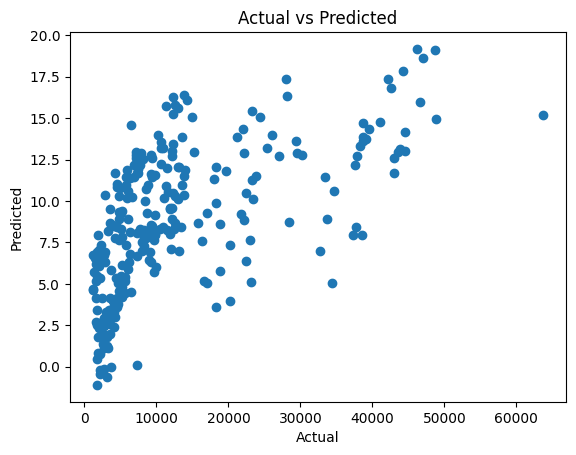

In [40]:
plt.scatter(y_test, y_pred_tf_linear_reg)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs Predicted')
plt.show()

In [41]:
# The Mean Squared Error (MSE) of 323,139,695.91 is quite high, especially considering that your target variable (medical charges) is in the range of thousands of dollars.

# Remember that MSE is the average of the squared differences between the predicted and actual values. This means the average error (the difference between predicted and actual) is roughly the square root of the MSE. The square root of 323,139,695.91 is approximately 17,976.

# So, on average, your TensorFlow Linear Regression model's predictions are off by about $17,976. Given that the medical charges themselves range from around $1,000 to over $60,000, an average error of nearly $18,000 is quite significant.

# A "good" or "reasonable" MSE value is relative to the scale of your data and what is considered acceptable in your specific domain. However, to consider this model effective, you would ideally want an MSE that is substantially lower, indicating that your predictions are much closer to the actual charges. For example, an MSE where the square root is in the range of a few thousand dollars or less would generally be considered much better for this dataset.

# The high MSE for the TensorFlow Linear Regression model, compared to the ANN model's test loss of around 35 million (which has a square root of about 5,900), suggests that in this case, the ANN is performing significantly better at reducing the prediction error.


# what would be the approach to mnimize this
# Given the high MSE you're seeing with the simple Linear Regression model compared to your ANN, it suggests that the relationship between your input features and medical charges is likely more complex than a simple linear relationship can capture.

# Therefore, the approach to minimize the loss would be to focus on improving your Artificial Neural Network (ANN) model. Here are some ways you can try to minimize the loss of your ANN:

# Hyperparameter Tuning: Experiment with different values for the hyperparameters we discussed earlier:
# Learning Rate: Try different learning rates for the Adam optimizer.
# Number of Layers and Units: Experiment with adding more hidden layers or changing the number of neurons in each layer.
# Dropout Rates: Adjust the dropout rates to find a balance between preventing overfitting and retaining model capacity.
# Activation Functions: While ReLU is common, you could explore others like LeakyReLU, PReLU, or ELU for the hidden layers.
# More Epochs (with Early Stopping): Train the model for more epochs, but make sure to re-enable and properly configure the early stopping callback. This will help you train long enough to converge but stop before overfitting occurs.
# Different Optimizers: While Adam is a good general-purpose optimizer, you could try others like SGD with momentum, Adagrad, or RMSprop.
# Regularization: Besides dropout, you could explore other regularization techniques like L1 or L2 regularization applied to the layers' weights.
# Feature Engineering: Revisit your features. Are there any interactions between features or transformations that could better represent the underlying patterns?
# Cross-Validation: While you have a train/test split, using k-fold cross-validation during model development and hyperparameter tuning can give you a more robust estimate of your model's performance.
# We can start by re-enabling and configuring early stopping for your ANN model training.

#Tensor flow Decision Forest

In [43]:
import ydf
import pandas as pd
from sklearn.metrics import mean_squared_error, r2_score

# Initialize the Decision Tree Regressor learner using ydf
# You can adjust parameters like max_depth, min_examples, etc.
dt_reg_learner = ydf.DecisionTreeLearner(label="charges", task=ydf.Task.REGRESSION, random_seed=42)

# Train the model
# ydf.train expects the entire DataFrame including the label column.
# Let's create a DataFrame with both features and the target for training.
train_df = x_train.copy()
train_df['charges'] = y_train

# Train the learner and get the trained model
dt_reg_model = dt_reg_learner.train(train_df)

# Make predictions on the test data
# ydf predict expects only the features
y_pred_dt_reg = dt_reg_model.predict(x_test)

# Evaluate the model
mse_dt_reg = mean_squared_error(y_test, y_pred_dt_reg)
r2_dt_reg = r2_score(y_test, y_pred_dt_reg)

print(f"YDF Decision Tree Regressor Performance:")
print(f"Mean Squared Error: {mse_dt_reg}")
print(f"R-squared: {r2_dt_reg}")

Train model on 1070 examples
Model trained in 0:00:00.016509
YDF Decision Tree Regressor Performance:
Mean Squared Error: 21957991.23241349
R-squared: 0.8585625079095927
